O modelo SEIR é um modelo matemático que descreve a evolução de uma doença infecciosa com base na transição dos individuos de uma população em quatro compartimentos, ou fases, distintas: 
- Sucetíveis: Indivíduos sem imunidade à doença e ainda não infectados
- Expostos: Indivídos já infectados porém em fase de incubação e portanto não infecciosos
- Infecciosos: Portadores transmissores
- Recuperados: Individuos recuperados e imunes. 

Parâmetros:
-----------

 γ - Taxa de recuperação = 1/Duração média da doença
 σ - Taxa de incubação = 1/periodo médio de incubação
 β - Taxa de Infecção = razão de disseminação da doença, no código abaixo modelada como Contatos Por dia multiplicado pela possibilidade de um contato transmitir a infecção. 
 
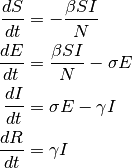

Modelo:
--------

O modelo é dado pelas equações diferenciais do modelo SEIR sem dinâmicas vitais (i.e., assumindo uma população constante, conforme encontradas em http://idmod.org/docs/hiv/model-seir.html#seir-without-vital-dynamics)

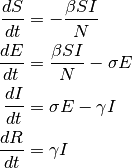

Resultado:
----------

O resultado é um gráfico que plota, para um periodo de 300 dias a evolução das quatro quantidades modeladas pelo SEIR, bem como uma projeção do numero de hospitalizações e internações de acordo com os ultimos numeros do CDC. (cerca de 20% de casos identificados exigindo hospitalização, e cerca de 5% com necessidade cuidados intensivos (UTI). 



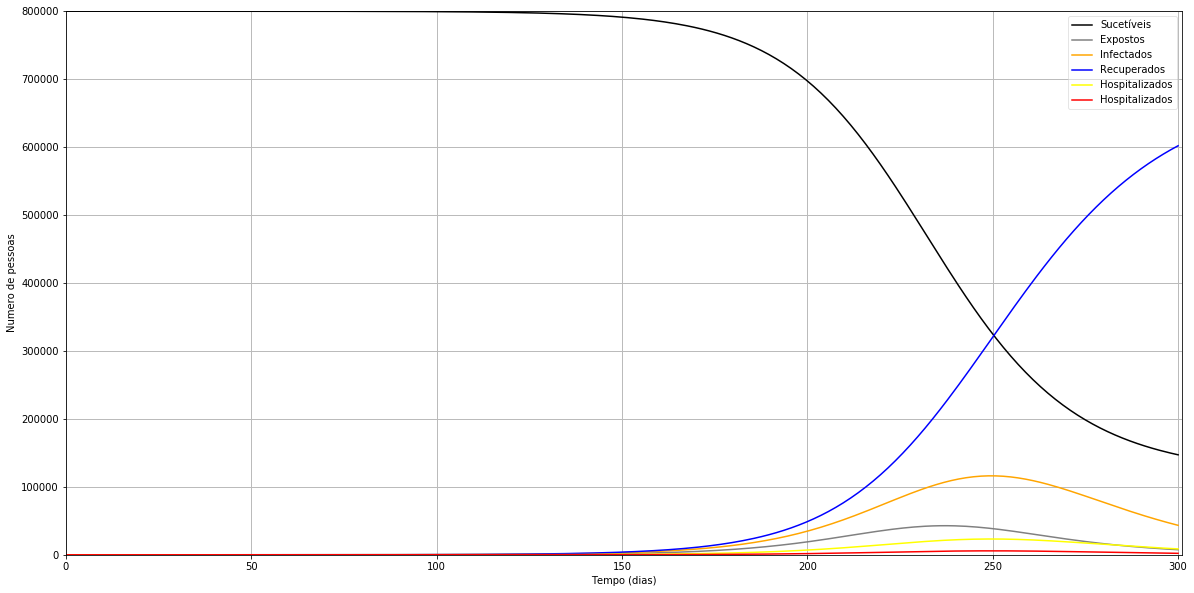

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# população brasil
N = 800000
#infectados iniciais
I0 = 1
#recuperados iniciais
R0 = 0
#sucetíveis iniciais
S0 = N
# expostos iniciais - não contagiosos ainda
E0 = 1
contatos_dia = 3
prob_contato = 0.05 #probabilidade de um contato transmitir a infecção, número assumido arbitrariamente como 5%
#razão de contato
beta = contatos_dia * prob_contato
#razão de recuperação média
gamma = 1/15 # assumir recuperação em 15 dias

hospitalizados = 0
internados_uti = 0
# 200 evenly spaced values (representing days)
t = np.linspace(0, 300, 300)

sigma = 1/5

ySeir0 = S0, I0, R0, E0, hospitalizados, internados_uti
def func_seir_model(ySeir0, t, N):
    S, I, R, E, hospitalizados, internados_uti = ySeir0
    dSdt = -(beta * S * I / N) 
    dEdt = beta * S * I /N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I 
    hospitalizados = dIdt * 0.2 #
    internados_uti = dIdt * 0.05
    return dSdt, dIdt, dRdt, dEdt, hospitalizados, internados_uti
    

#for beta_val in beta_values:
# Integrate the diff eqs over the time array
values = odeint(func_seir_model, ySeir0, t, args=(N,))
# assign S, I, R values from values transpose
S, I, R, E, hospitalizados, internados_uti = values.T
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'black', lw=1.5, label='Sucetíveis')
ax.plot(t, E, 'gray', lw=1.5, label='Expostos')
ax.plot(t, I, 'orange', lw=1.5, label='Infectados')
ax.plot(t, R, 'blue', lw=1.5, label='Recuperados')
ax.plot(t, hospitalizados, 'yellow', lw=1.5, label='Hospitalizados')
ax.plot(t, internados_uti, 'red', lw=1.5, label='Hospitalizados')
ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('Numero de pessoas')
ax.set_ylim(0,800000)
ax.set_xlim(0,301)
ax.grid(b=True, which='major', c='#bbbbbb', lw=1, ls='-')        
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()    